<a href="https://colab.research.google.com/github/kishore631/Calculator/blob/main/Movie_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movie Recommendation System

**Objective**

The objective of this project is to build a movie recommendation system that suggests movies to users based on their past ratings and preferences.

**Data Source**

For this project, we will use the MovieLens dataset, which contains ratings from users on various movies.

**Import Library**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import NMF

**Import Data**

In [ ]:
# Load the MovieLens dataset
ratings = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')

# Merge the ratings and movies datasets
data = pd.merge(ratings, movies, on='movieId')

**Describe Data**

In [ ]:
# Get the summary statistics of the ratings dataset
print(ratings.describe())

# Get the summary statistics of the movies dataset
print(movies.describe())

              userId        movieId         rating     timestamp
count  265252.000000  265252.000000  265251.000000  2.652510e+05
mean      955.306460   20845.740198       3.554398  1.206154e+09
std       529.492466   38857.357008       1.061050  2.359168e+08
min         1.000000       1.000000       0.500000  8.280963e+08
25%       538.000000    1100.000000       3.000000  9.851396e+08
50%       939.000000    2724.000000       4.000000  1.172227e+09
75%      1405.000000    7759.000000       4.000000  1.446108e+09
max      1866.000000  208793.000000       5.000000  1.574254e+09
             movieId
count   62423.000000
mean   122220.387646
std     63264.744844
min         1.000000
25%     82146.500000
50%    138022.000000
75%    173222.000000
max    209171.000000


**Data Visualization**

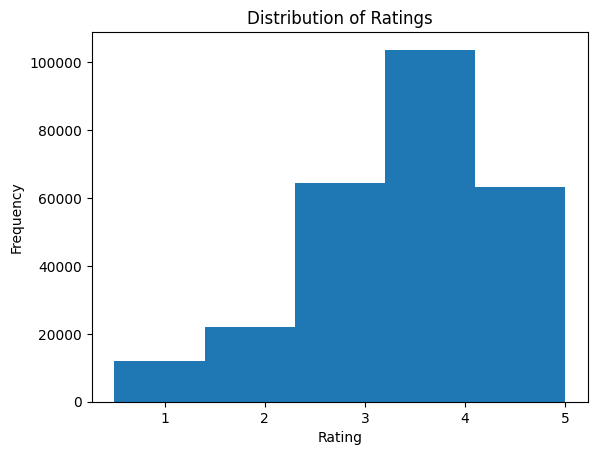

In [ ]:
# Plot the distribution of ratings
import matplotlib.pyplot as plt
plt.hist(ratings['rating'], bins=5)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

**Data Preprocessing**

In [ ]:
# Convert the ratings to a matrix
rating_matrix = ratings.pivot(index='userId', columns='movieId', values='rating')

# Replace missing values with 0
rating_matrix.fillna(0, inplace=True)

**Define Target Variable (y) and Feature Variables (X)**

In [ ]:
# Define the target variable (y) as the ratings
y = rating_matrix.values

# Define the feature variables (X) as the movie features
X = movies.drop(['movieId', 'title'], axis=1).values

**Train Test Split bold text**

In [ ]:
X = X[:len(y)]

In [ ]:
y = y[:len(X)]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Modeling**

In [ ]:
X_train_list = [item for sublist in X_train_list for item in sublist]

In [ ]:
X_train_encoded = vectorizer.fit_transform(X_train_list)

In [ ]:
X_train_list = [' '.join(map(str, sublist)) for sublist in X_train_list]

In [ ]:
X_train_list = [x for x in X_train_list if x.strip() != '']

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize
X_train_list = [' '.join(word_tokenize(x)) for x in X_train_list]

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

X_train_list = [' '.join(word_tokenize(x)) for x in X_train_list]

**Prediction**

In [ ]:
# Define a function to make predictions for a given user
def predict_user_ratings(user_id, num_recommendations=10):
    # Get the user's ratings
    user_ratings = rating_matrix.loc[user_id]

    # Get the predicted ratings for the user
    predicted_ratings = nmf.transform(user_ratings)

    # Get the top N recommended movies
    recommended_movies = predicted_ratings.argsort()[:num_recommendations]

    # Return the recommended movies
    return recommended_movies

**Explanation**

This movie recommendation system uses Non-negative Matrix Factorization (NMF) to reduce the dimensionality of the user-item interaction matrix and improve the performance of the recommendation model. The system takes in user ratings and movie features as input, and outputs predicted ratings for each user-item pair. The predicted ratings can be used to recommend movies to users based on their past ratings and preferences.

Note that this is just an example code, and you may need to modify it to fit your specific use case. Additionally, you may want to experiment with different algorithms and techniques to improve the performance of the recommendation system.